In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os


In [2]:
DataSet = pd.read_csv('SCMS_Delivery_History_Dataset.csv').fillna(0)

In [3]:
DataSet.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,0.0


In [4]:
DataSet.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [4]:


ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")



NameError: name 'go' is not defined

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1694
Mylan (formerly Matrix) Nashik     695
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       417
Trinity Biotech, Plc               383
Inverness Japan                    320
ABBVIE Ludwigshafen Germany        285
Cipla, Goa, India                  274
Strides, Bangalore, India.         256
ABBVIE (Abbott) Logis. UK          150
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

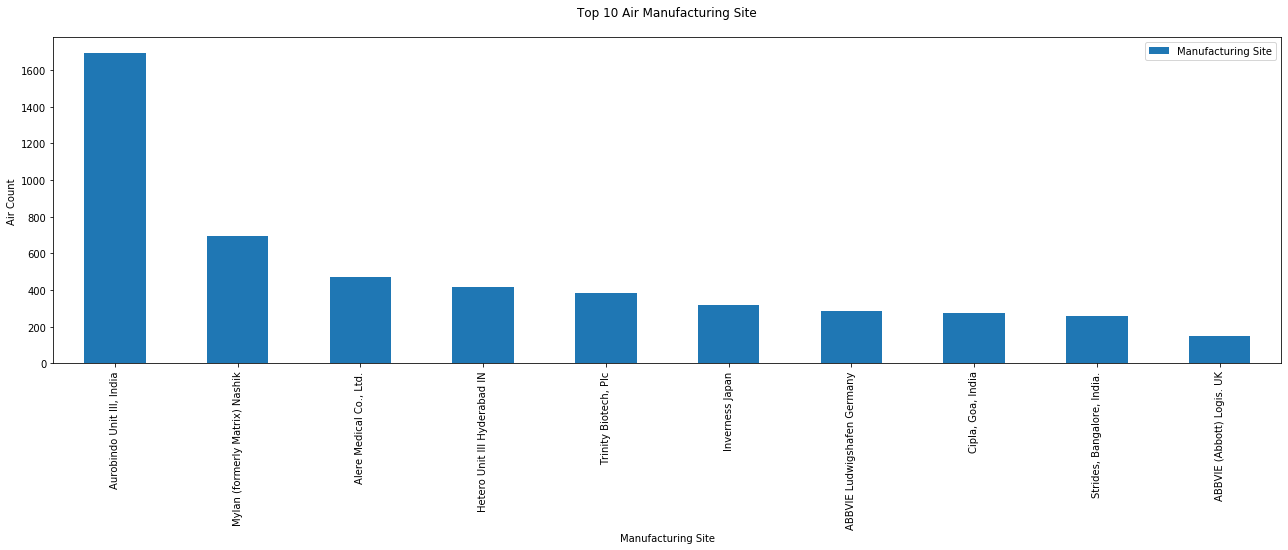

In [12]:


# Top 10 Air Shipment Mode in Bar Chart
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')



In [10]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

In [9]:
import sys
!{sys.executable} -m pip install plotly

     |████████████████████████████████| 11.5MB 734kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=24b22c1889526840301be065559335b5b064ae39938b5e716206fb3eb631c16c
  Stored in directory: /home/akarsh/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [1]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='pie')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('')
plt.xlabel('Manufacturing Site Name')


NameError: name 'plt' is not defined

Top 10 Countries Wise Count 

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64


Text(0.5, 0, 'Country Name')

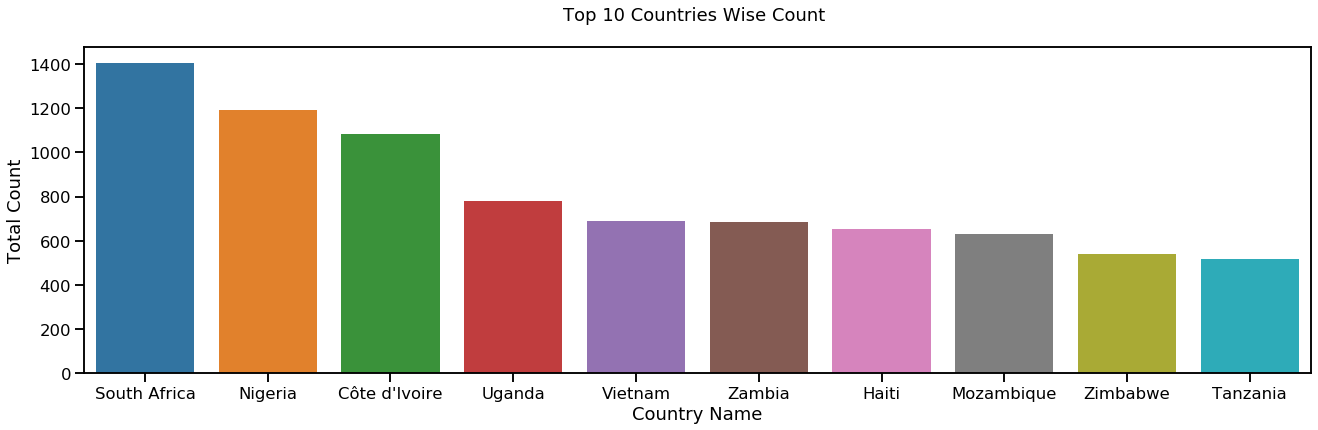

In [5]:


DataSet = DataSet.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

